In [89]:
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import pandas as pd

In [90]:
dataset1 = pd.read_csv('covid.csv')
dataset2 = pd.read_csv('covid_grouped.csv')
dataset3 = pd.read_csv('coviddeath.csv')

In [91]:
dataset1.size

3553

In [92]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
 16  iso_alpha         209 non-null    object 
dt

In [93]:
dataset2

Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
0      2020-01-22         Afghanistan          0       0          0       0   
1      2020-01-22             Albania          0       0          0       0   
2      2020-01-22             Algeria          0       0          0       0   
3      2020-01-22             Andorra          0       0          0       0   
4      2020-01-22              Angola          0       0          0       0   
...           ...                 ...        ...     ...        ...     ...   
35151  2020-07-27  West Bank and Gaza      10621      78       3752    6791   
35152  2020-07-27      Western Sahara         10       1          8       1   
35153  2020-07-27               Yemen       1691     483        833     375   
35154  2020-07-27              Zambia       4552     140       2815    1597   
35155  2020-07-27            Zimbabwe       2704      36        542    2126   

       New cases  New deaths  New recovered             WHO Region iso_alpha  
0              0           0              0  Eastern Mediterranean       AFG  
1              0           0              0                 Europe       ALB  
2              0           0              0                 Africa       DZA  
3              0           0              0                 Europe       AND  
4              0           0              0                 Africa       AGO  
...          ...         ...            ...                    ...       ...  
35151        152           2              0  Eastern Mediterranean            
35152          0           0              0                 Africa       ESH  
35153         10           4             36  Eastern Mediterranean       YEM  
35154         71           1            465                 Africa       ZMB  
35155        192           2             24                 Africa       ZWE  

[35156 rows x 11 columns]

In [94]:
dataset2.size

386716

In [95]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
 10  iso_alpha       35156 non-null  object
dtypes: int64(7), object(4)
memory usage: 3.0+ MB


In [96]:
dataset1.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'iso_alpha'],
      dtype='object')

In [97]:
dataset1.drop(['NewCases', 'NewDeaths', 'NewRecovered'], axis=1, inplace=True)

In [98]:
dataset1.sample(5)

Country/Region      Continent   Population  TotalCases  TotalDeaths  \
31           Israel           Asia    9197590.0       79559        576.0   
203       Greenland  North America      56780.0          14          NaN   
176  Cayman Islands  North America      65798.0         203          1.0   
44           Poland         Europe   37842302.0       49515       1774.0   
66         Ethiopia         Africa  115223736.0       20900        365.0   

     TotalRecovered  ActiveCases  Serious,Critical  Tot Cases/1M pop  \
31          53427.0      25556.0             358.0            8650.0   
203            14.0          0.0               NaN             247.0   
176           202.0          0.0               NaN            3085.0   
44          35642.0      12099.0              72.0            1308.0   
66           9027.0      11508.0             185.0             181.0   

     Deaths/1M pop  TotalTests  Tests/1M pop WHO Region iso_alpha  
31            63.0   1872453.0      203581.0     Europe       ISR  
203            NaN      5977.0      105266.0     Europe       GRL  
176           15.0     31108.0      472780.0        NaN       CYM  
44            47.0   2374686.0       62752.0     Europe       POL  
66             3.0    468814.0        4069.0     Africa       ETH

In [99]:
from plotly.figure_factory import create_table as py
colorscale = [[0, '#4d004c'], [.5, '#f2e5ff'], [1, '#ffffff']]
table = create_table(dataset1.head(15), colorscale=colorscale)
table

In [100]:
px.bar(dataset1.head(15),
       x = 'Country/Region',
       y = 'TotalCases',
       color = 'TotalCases',
       height = 500,
       hover_data = ['Country/Region', 'Continent'])

In [101]:
px.bar(dataset1.head(15), x = 'TotalTests',
       y = 'Country/Region',
       color = 'TotalTests',
       orientation ='h',
       height = 500,
       hover_data = ['Country/Region', 'Continent'])

In [102]:
px.bar(dataset1.head(15),
       x = 'TotalTests',
       y = 'Continent',
       color = 'TotalTests',
       orientation ='h',
       height = 500,
       hover_data = ['Country/Region', 'Continent'])

In [103]:
px.scatter(dataset1, x='Continent',
           y='TotalCases',
           hover_data=['Country/Region', 'Continent'],
           color='TotalCases',
           size='TotalCases',
           size_max=80)

In [104]:
px.scatter(dataset1.head(57),
           x='Continent',
           y='TotalCases',
           hover_data=['Country/Region', 'Continent'],
           color='TotalCases',
           size='TotalCases',
           size_max=80,
           log_y=True)

In [105]:
px.scatter(dataset1.head(54),
           x='Continent',
           y='TotalTests',
           hover_data=['Country/Region', 'Continent'],
           color='TotalTests',
           size='TotalTests',
           size_max=80)

In [106]:
px.scatter(dataset1.head(50),
           x='Continent',
           y='TotalTests',
           hover_data=['Country/Region', 'Continent'],
           color='TotalTests',
           size='TotalTests',
           size_max=80,
           log_y=True)

In [107]:
px.scatter(dataset1.head(100),
           x='Country/Region',
           y='TotalCases',
           hover_data=['Country/Region', 'Continent'],
           color='TotalCases',
           size='TotalCases',
           size_max=80)

In [108]:
px.scatter(dataset1.head(30),
           x='Country/Region',
           y='TotalCases',
           hover_data=['Country/Region', 'Continent'],
           color='Country/Region',
           size='TotalCases',
           size_max=80,
           log_y=True)

In [109]:
px.scatter(dataset1.head(10),
           x='Country/Region',
           y= 'TotalDeaths',
           hover_data=['Country/Region', 'Continent'],
           color='Country/Region',
           size= 'TotalDeaths',
           size_max=80)

In [110]:
px.scatter(dataset1.head(30),
           x='Country/Region',
           y= 'Tests/1M pop',
           hover_data=['Country/Region', 'Continent'],
           color='Country/Region',
           size= 'Tests/1M pop',
           size_max=80)

In [111]:
px.scatter(dataset1.head(30),
           x='Country/Region',
           y= 'Tests/1M pop',
           hover_data=['Country/Region', 'Continent'],
           color='Tests/1M pop',
           size= 'Tests/1M pop',
           size_max=80)

In [112]:
px.scatter(dataset1.head(30),
           x='TotalCases',
           y= 'TotalDeaths',
           hover_data=['Country/Region', 'Continent'],
           color='TotalDeaths',
           size= 'TotalDeaths',
           size_max=80)

In [113]:
px.scatter(dataset1.head(30),
           x='TotalCases',
           y= 'TotalDeaths',
           hover_data=['Country/Region', 'Continent'],
           color='TotalDeaths',
           size= 'TotalDeaths',
           size_max=80,
           log_x=True,
           log_y=True)

In [114]:
px.scatter(dataset1.head(30),
           x='TotalTests',
           y= 'TotalCases',
           hover_data=['Country/Region', 'Continent'],
           color='TotalTests',
           size= 'TotalTests',
           size_max=80,
           log_x=True,
           log_y=True)

In [115]:
px.bar(dataset2,
       x="Date",
       y="Confirmed",
       color="Confirmed",
       hover_data=["Confirmed", "Date", "Country/Region"],
       height=400)

In [116]:
px.bar(dataset2,
       x="Date",
       y="Confirmed",
       color="Confirmed",
       hover_data=["Confirmed", "Date", "Country/Region"],
       log_y=True,
       height=400)

In [117]:
px.bar(dataset2,
       x="Date",
       y="Deaths",
       color="Deaths",
       hover_data=["Confirmed", "Date", "Country/Region"],
       log_y=False,
       height=400)

In [118]:
df_US= dataset2.loc[dataset2["Country/Region"]=="US"]

In [119]:
px.bar(df_US, x="Date", y="Confirmed", color="Confirmed", height=400)

In [120]:
px.bar(df_US,x="Date", y="Recovered", color="Recovered", height=400)

In [121]:
px.line(df_US,x="Date", y="Recovered", height=400)

In [122]:
px.line(df_US,x="Date", y="Deaths", height=400)

In [123]:
px.line(df_US,x="Date", y="New cases", height=400)

In [124]:
px.bar(df_US,x="Date", y="New cases", height=400)

In [125]:
px.scatter(df_US, x="Confirmed", y="Deaths", height=400)

In [126]:
px.choropleth(dataset2,
              locations="iso_alpha",
              color="Confirmed",
              hover_name="Country/Region",
              color_continuous_scale="Blues",
              animation_frame="Date")

In [127]:
px.choropleth(dataset2,
              locations='iso_alpha',
              color="Deaths",
              hover_name="Country/Region",
              color_continuous_scale="Viridis",
              animation_frame="Date" )

In [128]:
px.choropleth(dataset2,
              locations='iso_alpha',
              color="Recovered",
              hover_name="Country/Region",
              color_continuous_scale="RdYlGn",
              projection="natural earth",
              animation_frame="Date" )

In [129]:
px.bar(dataset2,
       x="WHO Region",
       y="Confirmed",
       color="WHO Region",
       animation_frame="Date",
       hover_name="Country/Region")

In [130]:
dataset3.tail()

Data as of  Start Week    End Week State           Condition Group  \
12255  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12256  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12257  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12258  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12259  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   

      Condition ICD10_codes   Age Group  Number of COVID-19 Deaths  \
12255  COVID-19        U071       65-74                     5024.0   
12256  COVID-19        U071       75-84                     5381.0   
12257  COVID-19        U071         85+                     4841.0   
12258  COVID-19        U071  Not stated                        NaN   
12259  COVID-19        U071    All ages                    20628.0   

                                  Flag  
12255                              NaN  
12256                              NaN  
12257                              NaN  
12258  Counts less than 10 suppressed.  
12259                              NaN

In [131]:
dataset3.groupby(["Condition"]).count()

Data as of  Start Week  \
Condition                                                                    
Adult respiratory distress syndrome                        540         540   
All other conditions and causes (residual)                 540         540   
Alzheimer disease                                          530         530   
COVID-19                                                   540         540   
Cardiac arrest                                             520         520   
Cardiac arrhythmia                                         540         540   
Cerebrovascular diseases                                   530         530   
Chronic lower respiratory diseases                         540         540   
Diabetes                                                   540         540   
Heart failure                                              540         540   
Hypertensive diseases                                      540         540   
Influenza and pneumonia                                    540         540   
Intentional and unintentional injury, poisoning...         520         520   
Ischemic heart disease                                     540         540   
Malignant neoplasms                                        540         540   
Obesity                                                    530         530   
Other diseases of the circulatory system                   530         530   
Other diseases of the respiratory system                   540         540   
Renal failure                                              540         540   
Respiratory arrest                                         480         480   
Respiratory failure                                        540         540   
Sepsis                                                     530         530   
Vascular and unspecified dementia                          530         530   

                                                    End Week  State  \
Condition                                                             
Adult respiratory distress syndrome                      540    540   
All other conditions and causes (residual)               540    540   
Alzheimer disease                                        530    530   
COVID-19                                                 540    540   
Cardiac arrest                                           520    520   
Cardiac arrhythmia                                       540    540   
Cerebrovascular diseases                                 530    530   
Chronic lower respiratory diseases                       540    540   
Diabetes                                                 540    540   
Heart failure                                            540    540   
Hypertensive diseases                                    540    540   
Influenza and pneumonia                                  540    540   
Intentional and unintentional injury, poisoning...       520    520   
Ischemic heart disease                                   540    540   
Malignant neoplasms                                      540    540   
Obesity                                                  530    530   
Other diseases of the circulatory system                 530    530   
Other diseases of the respiratory system                 540    540   
Renal failure                                            540    540   
Respiratory arrest                                       480    480   
Respiratory failure                                      540    540   
Sepsis                                                   530    530   
Vascular and unspecified dementia                        530    530   

                                                    Condition Group  \
Condition                                                             
Adult respiratory distress syndrome                             540   
All other conditions and causes (residual)                      540   
Alzheimer disease                        

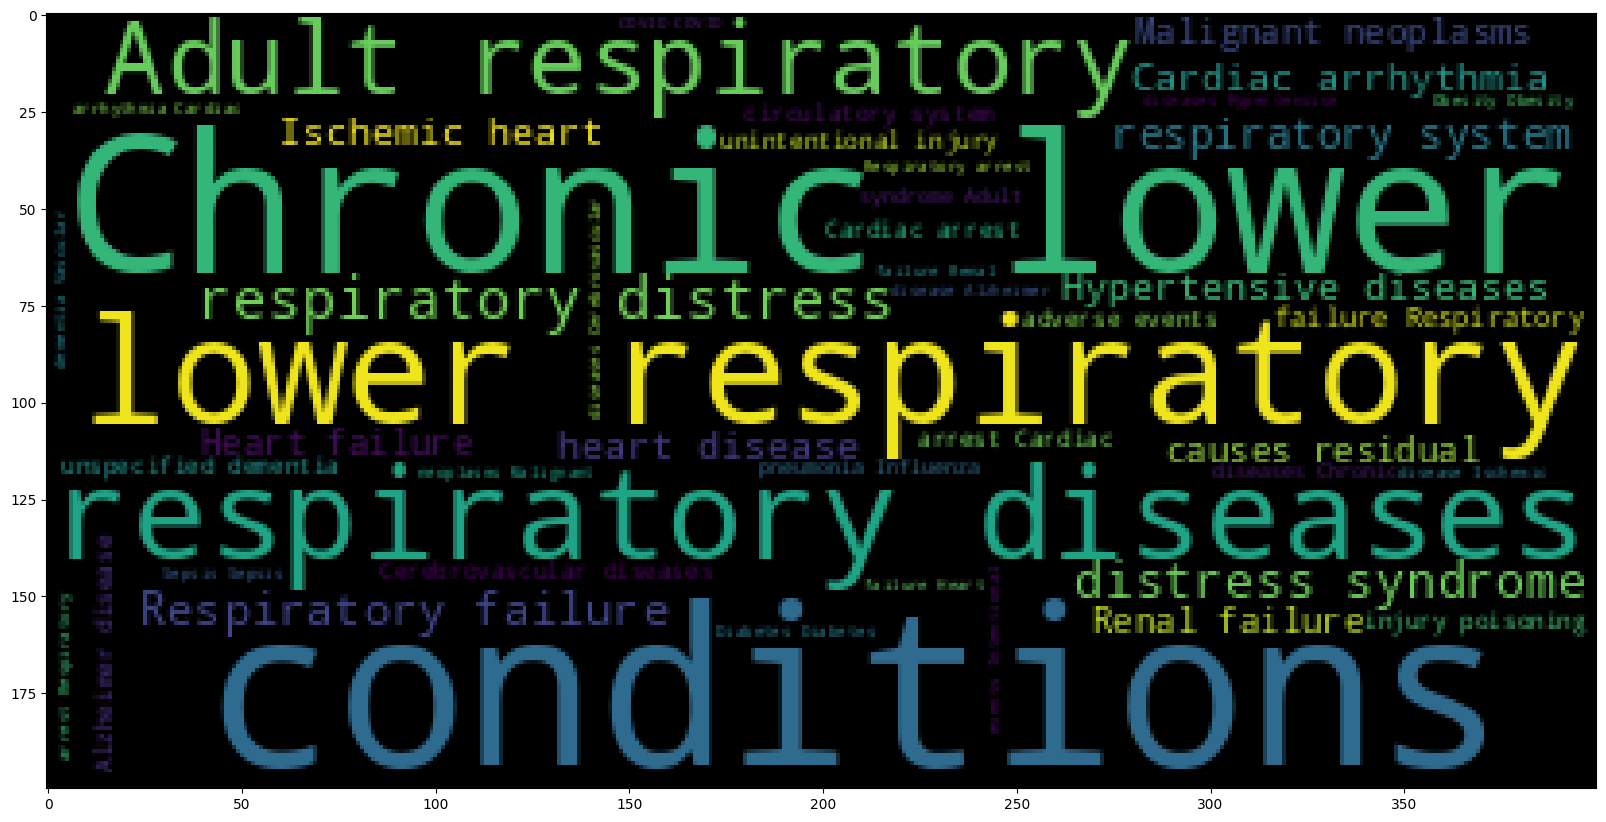

In [132]:
from wordcloud import WordCloud
sentences = dataset3["Condition"].tolist()
sentences_as_a_string = ' '.join(sentences)
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(sentences_as_a_string))

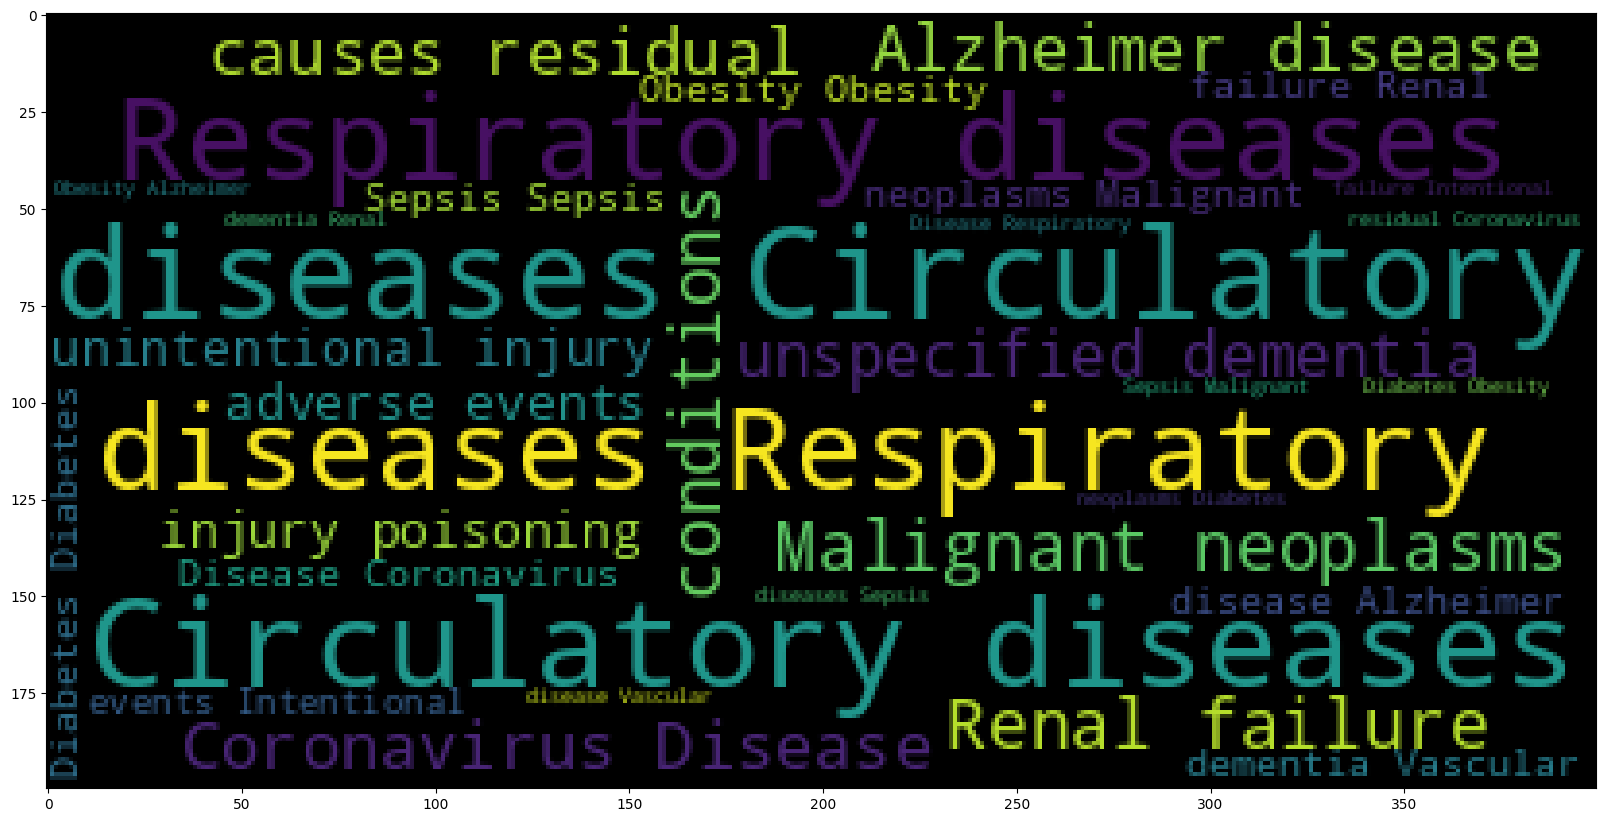

In [133]:
column2_tolist= dataset3["Condition Group"].tolist()
column_to_string= " ".join(column2_tolist)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(column_to_string))